# Week 7 Homework 6 (Due on Monday, March 23 at 11:59PM)
Perform 3-fold cross validation on TV vs. Sales by the following the instructions:

1. Use train_test split twice to randomly split the data into 3 subsets `data1`, `data2`, `data3`, each containing one third of data.

2. Train polynomial regression model with degree = 1, 2, 5, 10 on `data1` and `data2`, calculate the MSE on `data3`.

3. Train polynomial regression model with degree = 1, 2, 5, 10 on `data2` and `data3`, calculate the MSE on `data1`.

4. Train polynomial regression model with degree = 1, 2, 5, 10 on `data1` and `data3`, calculate the MSE on `data2`.

5. Now each of the three models has three mse values. Compare the average mse value of the models. Which model has the lowest average MSE?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url = "http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv"
advertising = pd.read_csv(url, index_col=0)
advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data = advertising[['TV', 'radio', 'newspaper', 'sales']]
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

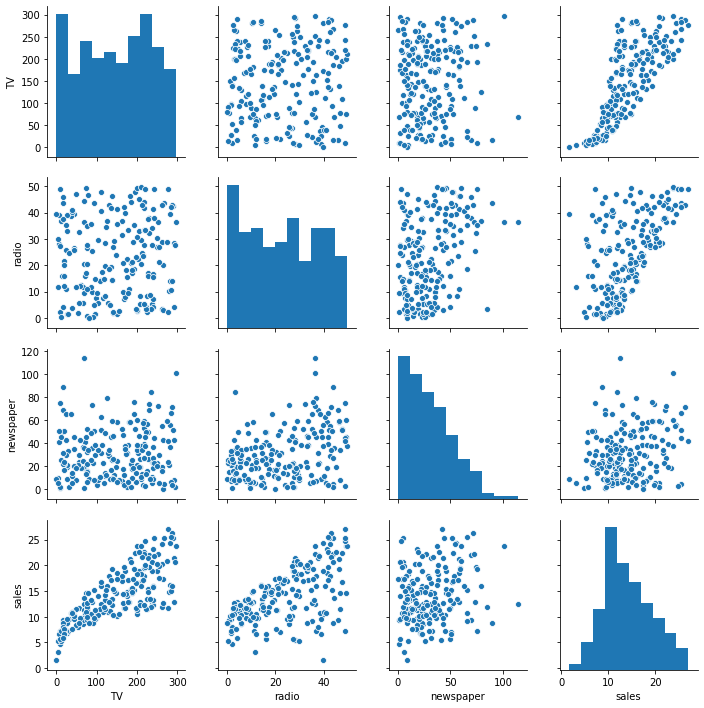

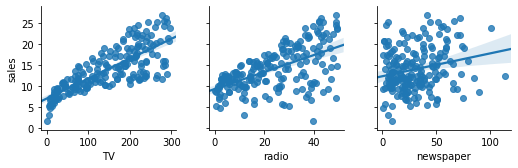

In [5]:
sns.pairplot(data)
sns.pairplot(data=data,x_vars=['TV','radio','newspaper'],y_vars='sales',kind='reg')

### Train_Test_Split

**1. Use train_test split twice to randomly split the data into 3 subsets data1, data2, data3, each containing one third of data.**

In [6]:
from sklearn.model_selection import train_test_split
temp, data1 = train_test_split(data, test_size=0.33)

In [7]:
temp.head()

,TV,radio,newspaper,sales
20,147.3,23.9,19.1,14.6
146,140.3,1.9,9.0,10.3
29,248.8,27.1,22.9,18.9
65,131.1,42.8,28.9,18.0
163,188.4,18.1,25.6,14.9


In [8]:
data1.head()

,TV,radio,newspaper,sales
61,53.5,2.0,21.4,8.1
156,4.1,11.6,5.7,3.2
79,5.4,29.9,9.4,5.3
40,228.0,37.7,32.0,21.5
35,95.7,1.4,7.4,9.5


In [9]:
# train_test_split again
data2, data3 = train_test_split(temp, test_size=0.5)

In [10]:
data2.head()

,TV,radio,newspaper,sales
174,168.4,7.1,12.8,11.7
37,266.9,43.8,5.0,25.4
1,230.1,37.8,69.2,22.1
60,210.7,29.5,9.3,18.4
154,171.3,39.7,37.7,19.0


In [11]:
data3.head()

,TV,radio,newspaper,sales
29,248.8,27.1,22.9,18.9
26,262.9,3.5,19.5,12.0
143,220.5,33.2,37.9,20.1
112,241.7,38.0,23.2,21.8
128,80.2,0.0,9.2,8.8


### **Training the model**

**2. Train polynomial regression model with degree = 1, 2, 5, 10 on `data1` and `data2`, calculate the MSE on `data3`.**

In [12]:
data1_data2 = pd.concat([data1, data2], ignore_index=True, sort =False)

In [13]:
data1_data2.head()

,TV,radio,newspaper,sales
0,53.5,2.0,21.4,8.1
1,4.1,11.6,5.7,3.2
2,5.4,29.9,9.4,5.3
3,228.0,37.7,32.0,21.5
4,95.7,1.4,7.4,9.5


In [14]:
X = data1_data2.iloc[:,:-1]
y = data1_data2['sales']

**Degree = 1**

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=1, include_bias=False)
poly_features.fit(X)
X_poly = poly_features.transform(X)

model_pr = LinearRegression()
model_pr.fit(X_poly, y)
print(model_pr.coef_, model_pr.intercept_)

[ 0.04513406  0.20200125 -0.0067757 ] 2.9241379556464295


**Degree = 2**

In [17]:
# Fitting Polynomial Regression to the dataset
poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_features.fit(X)
X_poly = poly_features.transform(X)

model_pr = LinearRegression()
model_pr.fit(X_poly, y)
print(model_pr.coef_, model_pr.intercept_)

[ 5.04247273e-02  3.91848036e-02 -4.50865199e-03 -1.03212374e-04
  1.02366895e-03  1.34938101e-06  1.85050751e-04 -4.70257155e-06
  5.54706347e-05] 5.025002395892978


**Degree = 5**

In [18]:
# Fitting Polynomial Regression to the dataset
poly_features = PolynomialFeatures(degree=5, include_bias=False)
poly_features.fit(X)
X_poly = poly_features.transform(X)

model_pr = LinearRegression()
model_pr.fit(X_poly, y)
print(model_pr.coef_, model_pr.intercept_)

[ 1.47404882e-01 -4.22908548e-01 -5.09083672e-02 -1.46368282e-03
  5.82963572e-03 -3.33728315e-03  3.61537313e-02  1.64611943e-02
  6.45186287e-03  8.89600186e-06 -4.54408050e-05  2.26077143e-05
 -1.53988591e-04  4.25659044e-06  7.78059206e-05 -1.15456348e-03
 -7.46595221e-04 -4.94630540e-04 -1.85284638e-04 -2.63742875e-08
  1.74475038e-07 -9.86677093e-08  3.29185108e-07  4.81565602e-07
 -3.33397360e-07  3.21406246e-06  9.84201936e-08 -1.54761195e-06
 -1.97687069e-07  1.68071145e-05  1.56456477e-05  3.74369999e-06
  1.11565298e-05  8.77065757e-07  2.88051805e-11 -2.38142093e-10
  1.78367036e-10  1.79028938e-10 -1.47397177e-09  4.58058778e-10
 -8.44926467e-09  3.65861389e-09  4.23048228e-10  1.00365717e-09
  4.00411175e-09 -3.88828566e-08  2.77868085e-08 -2.02526776e-09
 -6.81824935e-10 -1.29797867e-07 -5.33227355e-08 -3.71146413e-08
 -6.21348347e-08 -4.69830489e-08  1.66991539e-09] 4.09851552177887


**Degree = 10**

In [19]:
# Fitting Polynomial Regression to the dataset
poly_features = PolynomialFeatures(degree=10, include_bias=False)
poly_features.fit(X)
X_poly = poly_features.transform(X)

model_pr = LinearRegression()
model_pr.fit(X_poly, y)
print(model_pr.coef_, model_pr.intercept_)

[ 2.05467767e-11  1.62694924e-12 -7.21228245e-16 -4.63278364e-12
  1.60099128e-12 -7.02010191e-15  3.34558053e-13  6.10381571e-13
  1.60408837e-13  4.32510640e-14 -5.64744788e-15  3.40015001e-14
 -2.69879699e-14  1.51515460e-14  1.25770418e-15 -1.14045804e-14
 -3.47046352e-15  7.89057300e-15  1.76972311e-15  2.58106775e-13
  5.57812294e-14  9.48151554e-14  6.81207424e-15  2.37188727e-14
  4.30709758e-14  3.14596361e-15  5.65265212e-15  9.52582976e-15
  1.77937249e-14  8.99201025e-16  1.46549268e-15  2.21868250e-15
  4.26979988e-15  7.50262725e-15  7.51394651e-12  2.07719885e-12
  2.98984894e-12  4.61751447e-13  6.92423460e-13  1.45606406e-12
  8.17305830e-14  1.82304906e-13  3.34272637e-13  6.37370470e-13
  2.06557881e-14  4.96408467e-14  9.22744849e-14  1.50431010e-13
  2.75571531e-13  9.63784177e-15  1.80882479e-14  2.94986433e-14
  4.51299484e-14  6.89929981e-14  1.20010674e-13  1.41968285e-10
  4.68355337e-11  6.28276505e-11  1.17146903e-11  1.54551408e-11
  3.34645711e-11  1.10875

**MSE on data3**

In [26]:
from sklearn.metrics import mean_squared_error
predictions = model_pr.predict(X_poly)
mse = mean_squared_error(y, predictions)
print("MSE:", mse)

MSE: 1.859378814961709


**3. Train polynomial rTrain polynomial regression model with degree = 1, 2, 5, 10 on `data2` and `data3`, calculate the MSE on `data1`.**

In [27]:
data2_data3 = pd.concat([data2, data3], ignore_index=True, sort =False)

In [28]:
data2_data3.head()

,TV,radio,newspaper,sales
0,168.4,7.1,12.8,11.7
1,266.9,43.8,5.0,25.4
2,230.1,37.8,69.2,22.1
3,210.7,29.5,9.3,18.4
4,171.3,39.7,37.7,19.0


In [29]:
X2 = data2_data3.iloc[:,:-1]
y2 = data2_data3['sales']

**Degree = 1**

In [30]:
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()
lr2.fit(X2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
# Fitting Polynomial Regression to the dataset
poly_features2 = PolynomialFeatures(degree=1, include_bias=False)
poly_features2.fit(X2)
X_poly2 = poly_features2.transform(X2)

model_pr2 = LinearRegression()
model_pr2.fit(X_poly2, y2)
print(model_pr2.coef_, model_pr2.intercept_)

[0.04718312 0.17510401 0.0032768 ] 3.037173475320115


**Degree = 2**

In [32]:
poly_features2 = PolynomialFeatures(degree=2, include_bias=False)
poly_features2.fit(X2)
X_poly2 = poly_features2.transform(X2)

model_pr2 = LinearRegression()
model_pr2.fit(X_poly2, y2)
print(model_pr2.coef_, model_pr2.intercept_)

[ 5.15581698e-02  1.47438078e-02  1.73969415e-02 -1.12033735e-04
  1.15546505e-03 -8.08133382e-05 -1.54396791e-05  1.92458440e-04
 -6.92000433e-05] 5.086909903815908


**Degree = 5**

In [33]:
poly_features2 = PolynomialFeatures(degree=5, include_bias=False)
poly_features2.fit(X2)
X_poly2 = poly_features2.transform(X2)

model_pr2 = LinearRegression()
model_pr2.fit(X_poly2, y2)
print(model_pr2.coef_, model_pr2.intercept_)

[ 1.47772401e-01 -4.44142232e-02  7.88903782e-02 -1.95218019e-03
  3.14496238e-03 -1.38251734e-04  1.34059366e-02 -8.52251635e-03
 -2.99461972e-03  1.37437059e-05 -1.00835575e-05  5.88465112e-06
 -5.09728175e-05 -1.64083740e-04  5.63107677e-05 -7.70525359e-04
  5.22363137e-04  2.87339783e-04 -3.87087853e-05 -4.52571335e-08
  5.50518077e-08 -4.85723757e-08 -5.35165525e-07  1.22252475e-06
 -4.45588239e-07  2.92605867e-06 -5.37349879e-07  1.48156679e-06
 -3.92020561e-07  1.80482282e-05 -1.04091803e-05 -6.89292400e-06
 -3.55320060e-06  1.78860689e-06  5.35624115e-11 -1.21699113e-10
  1.46141890e-10  2.48985394e-09 -3.35814124e-09  8.05267387e-10
 -1.24621666e-08  7.59687640e-09 -2.06275402e-09  1.19461260e-09
  1.90056459e-08 -2.51122705e-08  7.15661013e-09 -1.40163064e-08
  3.44022470e-09 -2.08398706e-07  1.86852878e-07 -1.04652389e-07
  1.45375093e-07 -1.53421502e-08 -1.18649271e-08] 3.520254135249317


**Degree = 10**

In [34]:
poly_features2 = PolynomialFeatures(degree=10, include_bias=False)
poly_features2.fit(X2)
X_poly2 = poly_features2.transform(X2)

model_pr2 = LinearRegression()
model_pr2.fit(X_poly2, y2)
print(model_pr2.coef_, model_pr2.intercept_)

[ 1.71585271e-11  1.87597630e-12  1.02221734e-12 -1.44882792e-13
  1.95514755e-13 -5.30100746e-13 -9.81714370e-14 -5.42382204e-16
 -8.09143249e-16  1.35028810e-14  2.32646240e-15 -4.45019174e-16
  2.62039951e-16 -9.03007408e-17 -2.29160513e-16  1.80362560e-16
 -3.93918466e-17 -6.43996495e-17 -1.04807900e-16  5.88277183e-13
  9.03723864e-14 -3.07261455e-14  1.27256576e-14 -5.53843636e-15
 -2.05043203e-14  1.81360827e-15 -1.41802501e-15 -3.83470818e-15
 -5.45417825e-15  2.79960477e-16 -3.16157970e-16 -7.75797783e-16
 -1.21528223e-15 -9.86093704e-16  1.70985252e-11  2.87384573e-12
 -2.00764266e-12  4.43392707e-13 -3.14370699e-13 -9.28493828e-13
  8.00013445e-14 -7.12223022e-14 -1.64050137e-13 -2.72711341e-13
  1.19610430e-14 -1.75495390e-14 -3.72892250e-14 -5.89451145e-14
 -7.36686639e-14  2.55877771e-15 -3.60143624e-15 -8.82650823e-15
 -1.35265804e-14 -1.84868215e-14 -1.64641570e-14  1.75644976e-10
  4.14466425e-11 -8.09846709e-11  8.62564515e-12 -1.18468252e-11
 -2.59095781e-11  3.09239

**MSE on data1**

In [35]:
predictions2 = model_pr2.predict(X_poly2)
mse2 = mean_squared_error(y2, predictions2)
print("MSE:", mse2)

MSE: 0.035419562516923415


**4. Train polynomial regression model with degree = 1, 2, 5, 10 on `data1` and `data3`, calculate the MSE on `data2`.**

In [36]:
data1_data3 = pd.concat([data1, data3], ignore_index=True, sort =False)

In [37]:
data1_data3.head()

,TV,radio,newspaper,sales
0,53.5,2.0,21.4,8.1
1,4.1,11.6,5.7,3.2
2,5.4,29.9,9.4,5.3
3,228.0,37.7,32.0,21.5
4,95.7,1.4,7.4,9.5


In [38]:
X3 = data1_data3.iloc[:,:-1]
y3 = data1_data3['sales']

**Degree = 1**

In [39]:
from sklearn.linear_model import LinearRegression
lr3 = LinearRegression()
lr3.fit(X3,y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
# Fitting Polynomial Regression to the dataset
poly_features3 = PolynomialFeatures(degree=1, include_bias=False)
poly_features3.fit(X3)
X_poly3 = poly_features3.transform(X3)

model_pr3 = LinearRegression()
model_pr3.fit(X_poly3, y3)
print(model_pr3.coef_, model_pr3.intercept_)

[0.04531157 0.18869275 0.00105879] 2.7985020628900372


**Degree = 2**

In [41]:
poly_features3 = PolynomialFeatures(degree=2, include_bias=False)
poly_features3.fit(X3)
X_poly3 = poly_features3.transform(X3)

model_pr3 = LinearRegression()
model_pr3.fit(X_poly3, y3)
print(model_pr3.coef_, model_pr3.intercept_)

[ 5.33875098e-02  1.18010732e-02  7.15308199e-03 -1.15469485e-04
  1.12170437e-03 -5.38024707e-05  1.89721560e-04  7.38171222e-05
  2.16086174e-05] 5.137723292018846


**Degree = 5**

In [42]:
poly_features3 = PolynomialFeatures(degree=5, include_bias=False)
poly_features3.fit(X3)
X_poly3 = poly_features3.transform(X3)

model_pr3 = LinearRegression()
model_pr3.fit(X_poly3, y3)
print(model_pr3.coef_, model_pr3.intercept_)

[ 1.72413989e-01 -4.75467866e-01  7.09555106e-02 -2.16219668e-03
  7.25479321e-03 -2.92575943e-03  3.32350642e-02  1.64386476e-02
 -2.27180282e-03  1.47102605e-05 -4.10946826e-05  2.38737437e-05
 -2.05619219e-04 -1.00788292e-04  7.55181095e-05 -7.09164498e-04
 -1.21128572e-03  3.84749636e-05 -4.65642779e-05 -4.87425856e-08
  1.84103815e-07 -9.66439769e-08 -6.03216773e-08  7.23861893e-07
 -4.03626703e-07  4.49444760e-06  1.77273644e-06 -1.51828365e-07
 -3.82516636e-07  5.99809977e-06  1.75797983e-05  1.63823443e-05
 -7.54147111e-06  2.36974348e-06  6.09738926e-11 -3.25004551e-10
  1.61119090e-10  1.35314802e-09 -1.73564941e-09  6.11217556e-10
 -9.66115499e-09  4.41380279e-09 -3.37218475e-09  2.12211962e-09
  2.04287041e-09 -3.74306966e-08 -1.35669256e-08  1.94126984e-08
 -5.60648134e-09 -5.72843026e-08 -2.32673529e-08 -1.86921309e-07
  1.97653667e-08  1.61074897e-08 -9.43594862e-09] 3.7265230847576074


**Degree = 10**

In [43]:
poly_features3 = PolynomialFeatures(degree=10, include_bias=False)
poly_features3.fit(X3)
X_poly3 = poly_features3.transform(X3)

model_pr3 = LinearRegression()
model_pr3.fit(X_poly3, y3)
print(model_pr3.coef_, model_pr3.intercept_)

[-5.08007649e-13  1.64981890e-12 -5.06156759e-18 -1.01981213e-12
  3.80483174e-13 -1.81142364e-15  7.42383993e-13 -3.92040012e-14
  1.12042175e-14  3.05361265e-15  3.91654289e-15 -1.37324465e-15
  2.95455180e-14  1.01602769e-14 -6.70975063e-15  5.77080687e-15
  3.76012044e-15  8.86990740e-15 -6.05472974e-15  1.91734243e-13
  5.49376267e-14  3.02071461e-14  1.56302658e-14  1.46357611e-14
  1.53572566e-14  4.68673995e-15  5.64922875e-15  6.94343565e-15
  8.25343598e-15  7.49829430e-16  1.67991892e-15  2.78777049e-15
  3.25515991e-15  4.90102382e-15  5.91258298e-12  1.76051287e-12
  5.52657875e-13  6.13576528e-13  4.36720677e-13  3.48420594e-13
  1.75252333e-13  1.89370539e-13  2.24641698e-13  1.92997509e-13
  5.26517442e-14  6.37136829e-14  8.51042166e-14  1.04238129e-13
  1.17164204e-13  1.45499833e-14  2.16427772e-14  3.03855115e-14
  4.02287588e-14  4.94435186e-14  7.61214444e-14  1.06122310e-10
  3.46322361e-11 -6.11876790e-13  1.78147205e-11  6.61008391e-12
  4.37354045e-12  5.32737

**MSE on data2**

In [44]:
predictions3 = model_pr3.predict(X_poly3)
mse3 = mean_squared_error(y3, predictions3)
print("MSE:", mse3)

MSE: 0.4926178740333943


**4. Compare the average mse value of the models. Which model has the lowest average MSE?**

In [47]:
# Average MSE
print("Model 1:" , mse.mean())
print("Model 2:" , mse2.mean())
print("Model 3:" , mse3.mean())

Model 1: 1.859378814961709
Model 2: 0.035419562516923415
Model 3: 0.4926178740333943


In conclusion, the model with the lowest average MSE is the model with `data1` which is the second model that was trained.